Установите необходимые для инференса библиотеки

In [10]:
! pip install onnxruntime


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
from PIL import Image
import numpy as np
import onnxruntime as ort

In [12]:
# вспомогательная функция
def onnx_preprocessing(image, height=224, width=224, channels=3):
    image = image.resize((width, height))
    image_data = np.asarray(image).astype(np.float32)
    image_data = image_data.transpose([2, 0, 1]) # transpose to CHW
    mean = np.array([0.079, 0.05, 0]) + 0.406
    std = np.array([0.005, 0, 0.001]) + 0.224
    for channel in range(image_data.shape[0]):
        image_data[channel, :, :] = (image_data[channel, :, :] / 255 - mean[channel]) / std[channel]
    image_data = np.expand_dims(image_data, 0)
    return image_data

In [13]:
import time
import matplotlib.pyplot as plt


def check_photo(image_path, model_path):
    # указываем , какие провайдеры хотим использовать
    providers = ort.get_available_providers()

    # инициализация сессии выполнения (загрузка модели)
    ort_session = ort.InferenceSession(
        model_path,        # указываем путь до модели в формате ONNX
        providers=providers  # указываем провайдеры
    )

    # замеряем время
    start_time = time.time()

    image = Image.open(image_path)

    # готовим входной вектор: оборачиваем входной numpy.array в словарь с именем входной ноды 'input'
    onnx_input_tensor = onnx_preprocessing(image)
    ort_inputs = {'input': onnx_input_tensor}

    # Выполняем инференс
    ort_outputs = ort_session.run(None, ort_inputs)

    # замеряем время
    end_time = time.time()
    print('inference time = {:.3f}'.format(end_time - start_time))

    label = np.argmax(ort_outputs)

    if label == 1:
          print('It is real image')
    else:
          print('It is fake')
    plt.imshow(image)

Укажите путь до изображения и модели и проверьте фото

inference time = 0.025
It is real image


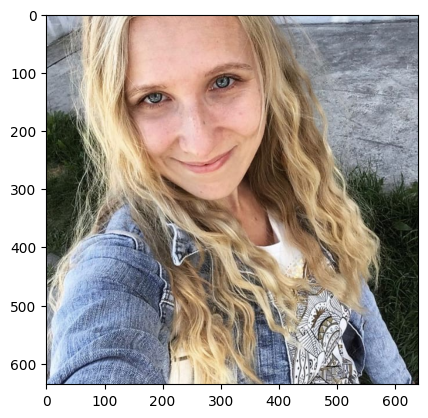

In [14]:
image_path = 'data/my_test/real.jpeg'
model_path = 'data/mobilenet.onnx'
check_photo(image_path, model_path)

inference time = 0.042
It is fake


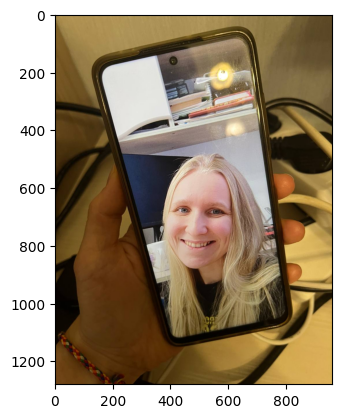

In [15]:
image_path = 'data/my_test/mobile.jpeg'
model_path = 'data/mobilenet.onnx'
check_photo(image_path, model_path)